# Imports

In [15]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(1234)

In [16]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
plt.rcParams.update({"axes.grid": True, "figure.figsize": (8, 4)})
import seaborn as sns

# sns.set()

# 14.1 Introduction

Decision trees, using iris data set as a demo

In [17]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names).join(
    pd.Series(iris["target"], name="species")
)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df.columns = [column.split(" (")[0].replace(" ", "_") for column in df.columns]
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='petal_length', ylabel='petal_width'>

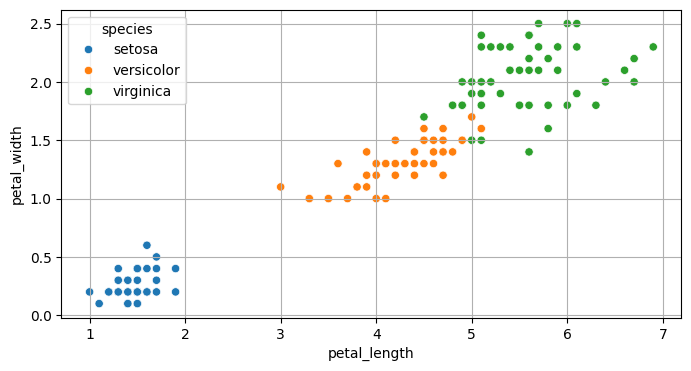

In [19]:
sns.scatterplot(df, x="petal_length", y="petal_width", hue="species")

# Overview - Building Decision Trees

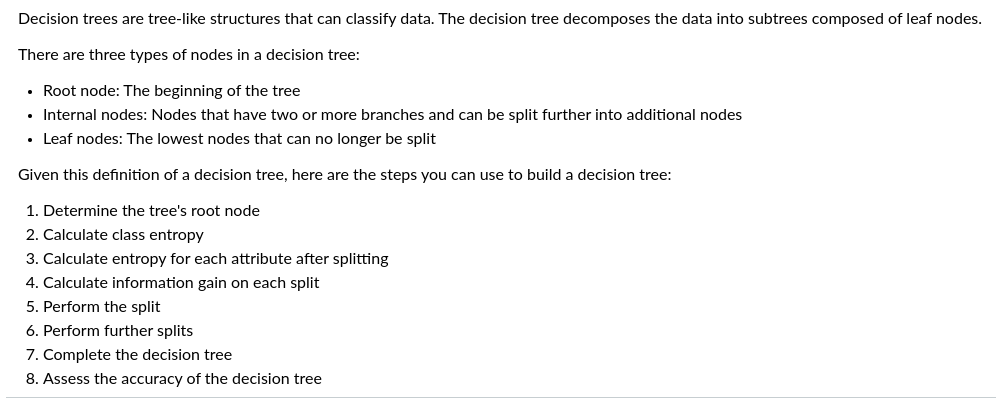

# 14.2 Building Trees Manually

<Axes: xlabel='petal_length', ylabel='petal_width'>

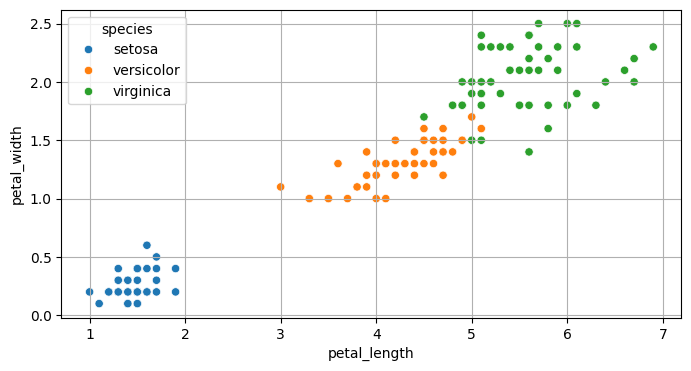

In [20]:
sns.scatterplot(df, x="petal_length", y="petal_width", hue="species")

Building a decision tree manually, describes how to come up with a series of rules to chop down the space in smaller and more specific chunks to pick off all the data

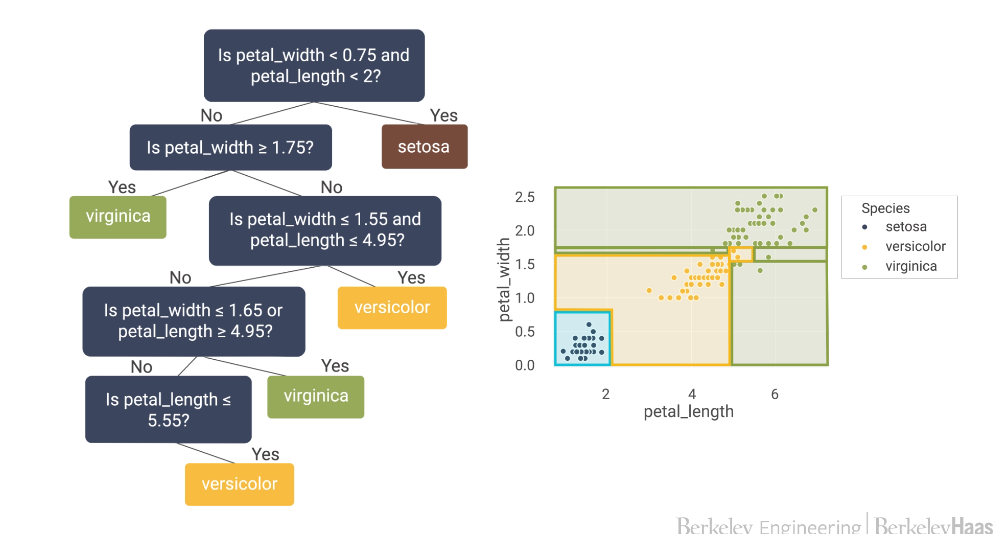

Questions
- What is the training error?
    - Training error is 0 since all points are correctly labeled
- And is that good or bad?
    - 0 is good, but the rules we used to get there are probably overfit / too specific, so that is bad

# 14.3 Building Decision Trees in sklearn

## Fit a Tree

In [21]:
feature_names = ["petal_length", "petal_width"]
X = df[feature_names]
y = df["species"]
decision_tree = tree.DecisionTreeClassifier(criterion="entropy").fit(X, y)
decision_tree

DecisionTreeClassifier(criterion='entropy')

In [22]:
four_rows = df.iloc[[18, 140, 104, 11], :]
four_rows

,sepal_length,sepal_width,petal_length,petal_width,species
18,5.7,3.8,1.7,0.3,setosa
140,6.7,3.1,5.6,2.4,virginica
104,6.5,3.0,5.8,2.2,virginica
11,4.8,3.4,1.6,0.2,setosa


In [23]:
decision_tree.predict(four_rows[feature_names])

array(['setosa', 'virginica', 'virginica', 'setosa'], dtype=object)

## Plot the Decision Tree

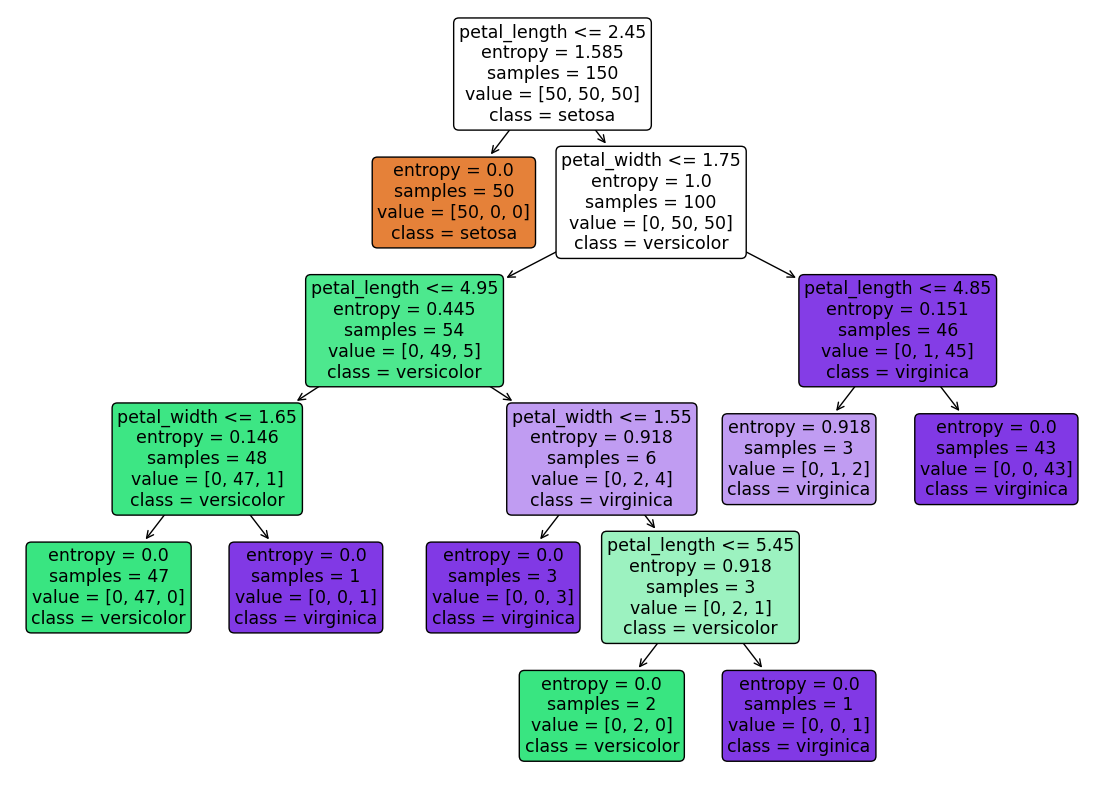

In [24]:
_, ax = plt.subplots(figsize=(14, 10))
obj = tree.plot_tree(
    decision_tree,
    feature_names=feature_names,
    class_names=y.unique(),
    rounded=True,
    filled=True,
    ax=ax,
)

### Understanding the tree labeling

- When a box is a yes/no question, the first line is the question
    - Example, first box shows: is petal length <= 2.45?
- Each box only ever uses a single feature
- samples means how many data samples input to that node
- value means samples per class
- last line class means most probable / most occurring class member
- most likely class per node is also represented with color
- darkness of color is confidence of that
- thus white means no majority class -> no color

## Plot the Decision Tree, with graphviz

Another option for plotting is graphviz

Here: https://pypi.org/project/graphviz/

and also here: https://www.graphviz.org/download/

In [25]:
# ! pip install graphviz
# ! sudo apt install graphviz

In [26]:
# import graphviz
# image_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=feature_names, class_names=y.unique(), rounded=True, filled=True)
# graph = graphviz.Source(image_data)
# graph.render(format="png", filename="./iris_decision_tree.png")
# graph

# Mini-Lesson on Graphviz

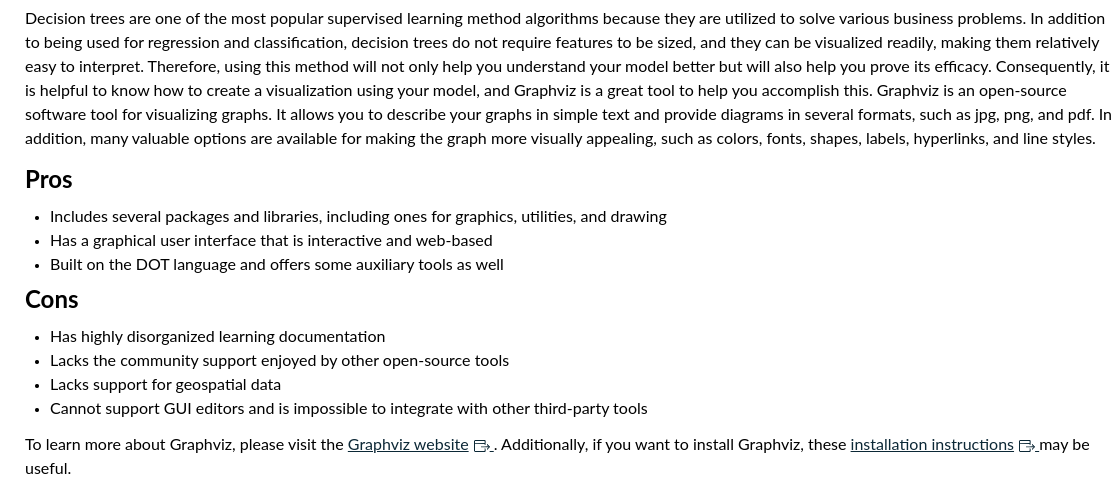

# 14.4 Measuring Accuracy

Check the accuracy of the tree

In [27]:
accuracy_score(y, decision_tree.predict(X)) * 100.0

99.33333333333333

Why is it not 100% accurate? Zoom in on one node with an "impure" state (impure = terminal but with values in more than one class)

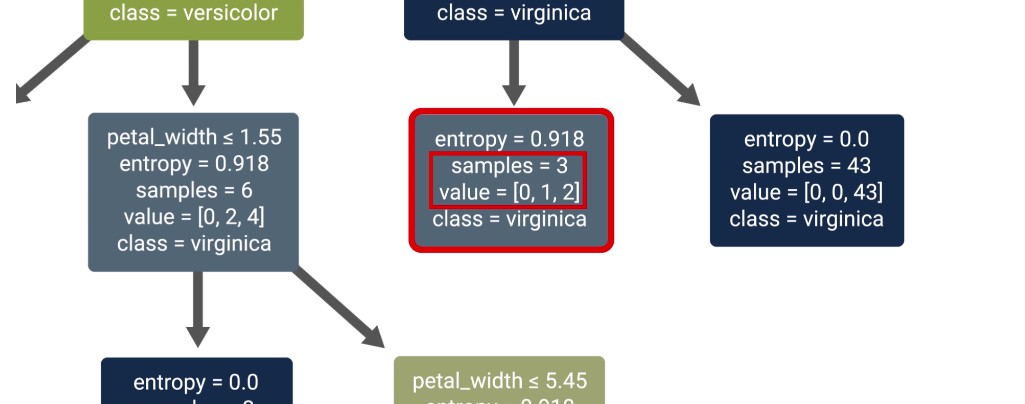

Why couldn't that node be broken down further? Inspect the data this node received
- Notice that for the 2 features provided to the tree (petal length and width), the data are identical
- So no rule can split these further --> need more features

In [28]:
df.query("petal_length > 2.45 and petal_width > 1.75 and petal_length < 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


>Decision trees have perfect accuracy on training data, **except** when there are samples from different classes with the exact same features

The tendency for these trees to have nearly perfect accuracy raises a concern about overfitting

# 14.5 Overfitting

In [35]:
sns.set()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

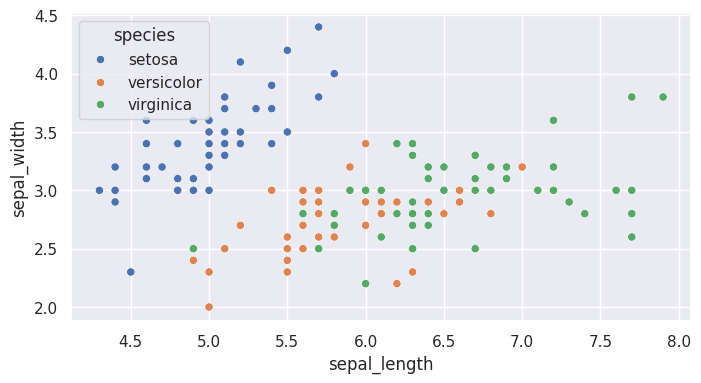

In [41]:
sns.scatterplot(df, x=df["sepal_length"], y=df["sepal_width"], hue=df["species"])

Looking at the decision boundary, we see so much complexity that it is unlikely to be reflecting physical reality
- Some points are misclassified, when samples overlap exactly

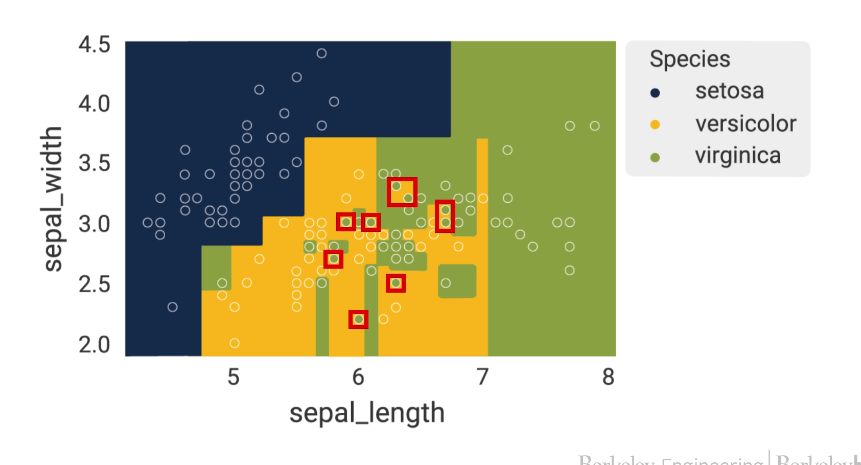

You can also look at the decision tree, and notice it is far more complicated

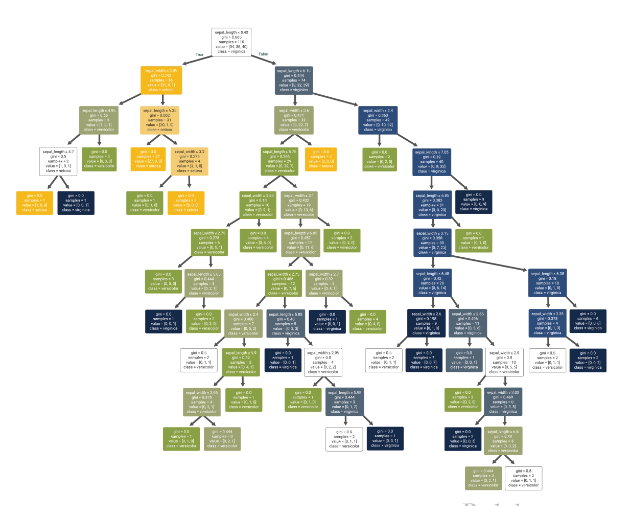

Also look at using all 4 features and look at the model graph to see if it's even more complicated

In [42]:
feature_names = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
X = df[feature_names]
y = df["species"]

In [43]:
decision_tree = tree.DecisionTreeClassifier(criterion="entropy").fit(X, y)
decision_tree
accuracy_score(y, decision_tree.predict(X)) * 100.0

100.0

Surprisingly, the resulting tree is not vastly more complicated
- On the left, using just petal length & width
- On the right, using petal length & width and sepal length & width

Big takeaway - decision trees do not necessarily get more complicated or more overfit when using more features
- Especially when some of those features are good at breaking up clusters of otherwise identical samples

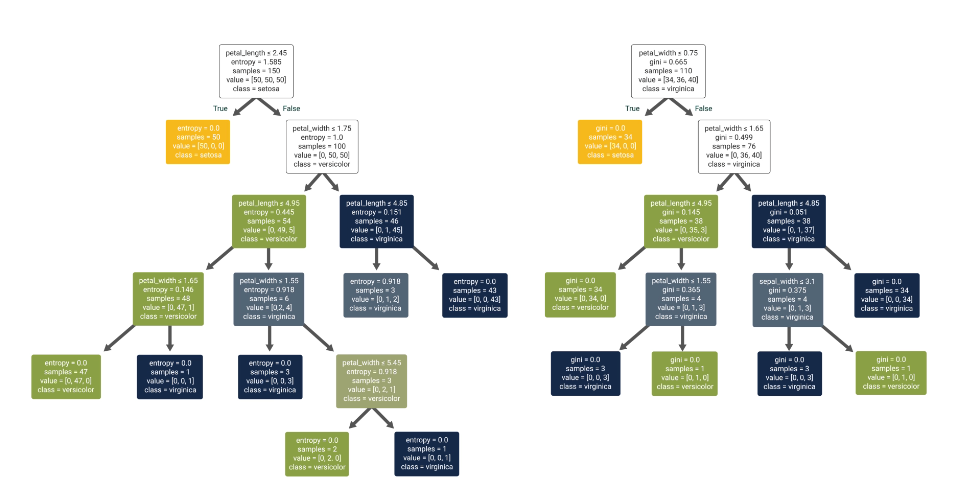